<a href="https://colab.research.google.com/github/dyjdlopez/intro_2_quantum/blob/main/qiskit/01_01_qubits_and_quantum_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Quantum Progamming: Qubits and Basic Operations
$_{\text{Made by: @dyjdlopez}}$

Quantum programming is the process of creating algorithms and simulations that harness the principles of quantum mechanics to solve problems in ways that classical computing cannot. Unlike classical bits, quantum bits (qubits) exhibit superposition, entanglement, and quantum interference, offering fundamentally new computational possibilities.

**Qiskit**, developed by IBM, is a powerful, open-source Python software development kit designed for quantum computing applications. It empowers researchers, students, and developers to prototype quantum algorithms, simulate quantum circuits, and run experiments on both quantum simulators and real quantum hardware.

In [1]:
!pip install qiskit
!pip install pylatexenc

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_histogram

## 1.1 Quantum Bits

In **quantum computing**, a **qubit** (quantum bit) is the fundamental unit of information, capable of existing in **superposition** (holding both 0 and 1 simultaneously) and exhibiting **entanglement** (strong correlations with other qubits that enable quantum parallelism and unique computation).

In **Qiskit**, qubits are managed within the [`QuantumCircuit`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) object, which acts as the main quantum workspace for designing and simulating quantum algorithms.


In [3]:
num_qubits = 1 # single bodied system
qc = QuantumCircuit(num_qubits)
qc.qubits

[<Qubit register=(1, "q"), index=0>]

To extract and analyze the quantum state of a circuit, Qiskit provides the [`Statevector`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) class. The statevector represents the full quantum state after a series of operations, allowing for direct inspection and visualization.

In [4]:
# Get the statevector
state = Statevector.from_instruction(qc)
print(state)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


## 1.2 Plotting the Bloch Sphere

Quantum states of a single qubit can be represented geometrically on the **Bloch sphere**. This visualization helps illustrate not only the **basis states** $|0\rangle$ and $|1\rangle$ (which sit at the north and south poles on the $z$-axis), but also other important quantum states along different axes of the sphere.

- The $z$-axis poles correspond to $|0\rangle$ and $|1\rangle$.
- The $x$-axis poles correspond to the states $|+\rangle$ and $|-\rangle$.
- The $y$-axis poles correspond to $|i\rangle$ and $|-i\rangle$.

Derived from the computational basis, the positive poles of the other axes are:
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
$$
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

$$
|i\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)
$$
$$
|-i\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)
$$
Understanding the location of these states on the Bloch sphere is essential for visualizing quantum superposition and the full range of qubit behavior.

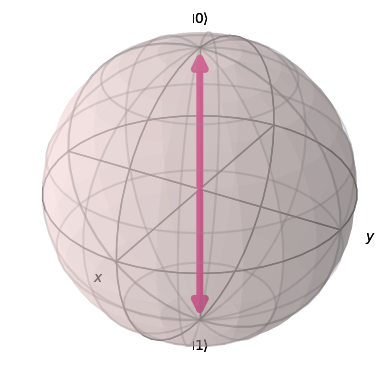

In [5]:
# Plotting on a bloch sphere
ket_0 = Statevector([1, 0])
ket_1 = Statevector([0, 1])
ket_plus = Statevector([None, None])
ket_minus = Statevector([None, None])
ket_i = Statevector([None, None])
ket_mini = Statevector([None, None])

def to_bloch_sphere_vectors(state : Statevector):
  alpha, beta = state
  x = 2 * np.real(np.conj(alpha) * beta)
  y = 2 * np.imag(np.conj(alpha) * beta)
  z = np.abs(alpha)**2 - np.abs(beta)**2
  return [x, y, z]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_bloch_vector(to_bloch_sphere_vectors(ket_0), ax=ax)  # |0>
plot_bloch_vector(to_bloch_sphere_vectors(ket_1), ax=ax)   # |1>

# plot_bloch_vector(to_bloch_sphere_vectors(ket_plus), ax=ax)  # |+>
# plot_bloch_vector(to_bloch_sphere_vectors(ket_minus), ax=ax)   # |->

# plot_bloch_vector(to_bloch_sphere_vectors(ket_i), ax=ax)  # |i>
# plot_bloch_vector(to_bloch_sphere_vectors(ket_mini), ax=ax)   # |-i>
plt.show()


Recall the general formula for a qubit statevector:
$$
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle
$$

Here, the variables $\theta$ and $\phi$ correspond to spherical coordinates on the Bloch sphere, representing the "latitude" and "longitude" of the quantum state:

- $\theta$ determines the angle from the $z$-axis (north pole to south pole).
- $\phi$ sets the azimuthal angle in the $xy$-plane.

**Both angles are restricted:**  
- $\theta$ ranges from $0$ to $\pi$
- $\phi$ ranges from $-\pi$ to $\pi$

These constraints mean every pure qubit state can be visualized as a point somewhere on the surface of the Bloch sphere, with its location entirely set by the values of $\theta$ and $\phi$.


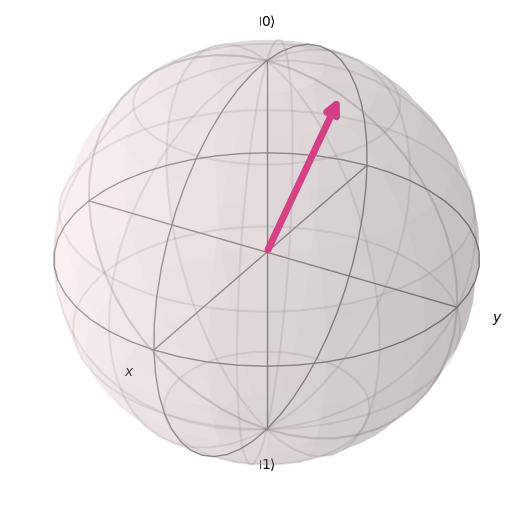

In [6]:
def make_state(theta, phi): # Only Rad
  return Statevector([np.cos(theta/2),np.exp(phi*1j)*np.sin(theta/2)])

theta = np.pi/8
phi = np.pi/2

ket_psi = make_state(theta=theta, phi=phi)
plot_bloch_vector(to_bloch_sphere_vectors(ket_psi))

## 1.3 Quantum Gates

Quantum gates are the fundamental operations in quantum computing, akin to logical gates in classical digital circuits. Each quantum gate manipulates the state of one or more qubits using the rules of quantum mechanics, enabling phenomena such as superposition and entanglement.

Unlike classical gates, quantum gates are **reversible** and are represented by unitary matrices. They transform the quantum statevector by rotating or reflecting it on the Bloch sphere. By combining different quantum gates, we construct quantum circuits that perform sophisticated algorithms and transformations.

In **Qiskit**, quantum gates and circuits are implemented using intuitive Python structures and classes. The [`QuantumCircuit`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) class acts as the main container for circuits and operations.

### 1.3.1 Single-qubit Gates

- **[Hadamard Gate (`h`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.h.html)**: Creates a superposition of the $|0⟩$ and $|1⟩$ states.  
  $$
  H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
  $$
  Implement it in Qiskit as `h(qubit)`.

- **[X Gate (`x`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.x.html)**: Flips the state of the qubit (NOT gate).  
  $$
  X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
  $$
  Implement it in Qiskit as `x(qubit)`.

- **[Y Gate (`y`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.y.html)**: Applies a rotation along the Y axis.  
  $$
  Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}
  $$
  Implement it in Qiskit as `y(qubit)`.

- **[Z Gate (`z`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.z.html)**: Applies a rotation along the Z axis.  
  $$
  Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
  $$
  Implement it in Qiskit as `z(qubit)`.

- **[S Gate (`s`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.s.html)**: Rotates the qubit phase by $\frac{\pi}{2}$.  
  $$
  S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}
  $$
  Implement it in Qiskit as `s(qubit)`.

- **[T Gate (`t`)](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.t.html)**: Rotates the qubit phase by $\frac{\pi}{4}$.  
  $$
  T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}
  $$
  Implement it in Qiskit as `t(qubit)`.


Statevector: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


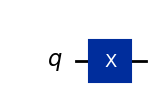

In [7]:
# Create a single-qubit circuit
qc = QuantumCircuit(1)
qc.x(0)  # Apply a gate

# Get the resulting statevector
state = Statevector.from_instruction(qc)
print("Statevector:", state)

# Draw the circuit diagram
qc.draw('mpl')

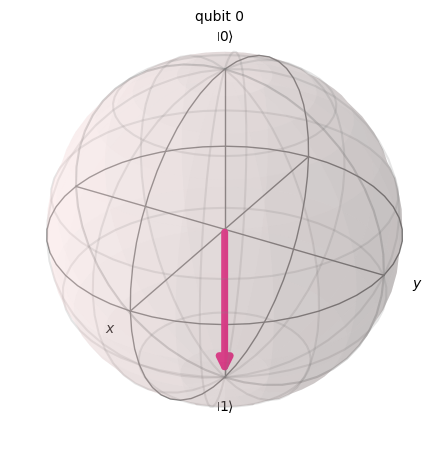

In [8]:
# Plot the Bloch sphere
plot_bloch_multivector(state)

### 1.3.2 Measurement

In quantum computing, **measurement** is the process of determining the state of a qubit. Unlike classical bits, quantum bits (qubits) exist in superpositions, and measuring a qubit collapses it into one of its basis states ($|0⟩$ or $|1⟩$). This irreversible process is fundamental for extracting results from quantum circuits.

In **Qiskit**, measurement is performed using the [`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) operation. The `measure` method links a qubit to a classical bit, recording the measurement outcome either $0$ or $1$ in the corresponding classical register.

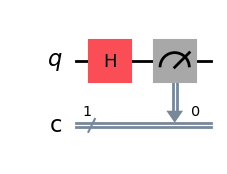

In [15]:
# Create a single-qubit circuit
qc = QuantumCircuit(1,1)
qc.h(0)  # Apply a gate

qc.measure(0,0)

# Draw the circuit diagram
qc.draw('mpl')

To obtain the classical value (measurement outcome) from a quantum circuit in Qiskit, you need to:

1. **Add a measurement to the circuit** using `qc.measure(qubit, classical_bit)`.
2. **Execute the circuit** on a simulator or real quantum device.
3. **Access the results** (bit values) from the execution output.

In [20]:
from qiskit_aer import AerSimulator
from qiskit import transpile

simulator = AerSimulator()

compiled_circuit = transpile(qc, simulator)


job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 502, '0': 522}



- The dictionary `counts` gives the number of times each measurement result was observed (e.g., `{'0': 510, '1': 514}` for a fair superposition).
- The keys `'0'` and `'1'` are the classical values that result from measuring the quantum state.


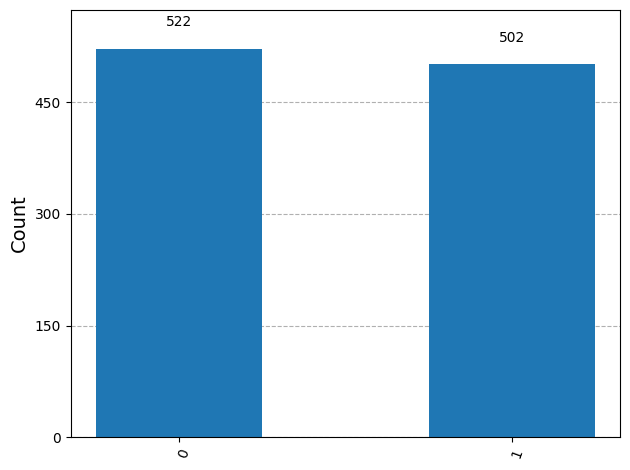

In [21]:
# Plot histogram
plot_histogram(counts)

---

---
$$_{\text{END OF FILE}}$$
$$_{\text{D.J.D. Lopez | © 2025}}$$